<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Методы машинного обучения</center></h1>
<h2><center>Семинар: метрические методы</center></h2>

In [57]:
%matplotlib inline

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Стоимоcть жилья в Калифорнии

Будем использовать стандартный датасет из sklearn (Нужен интернет)

In [59]:
from sklearn.datasets import fetch_california_housing

In [60]:
data = fetch_california_housing()

X = data.data
y = data.target

In [61]:
X.shape

(20640, 8)

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <a list of 10 Patch objects>)

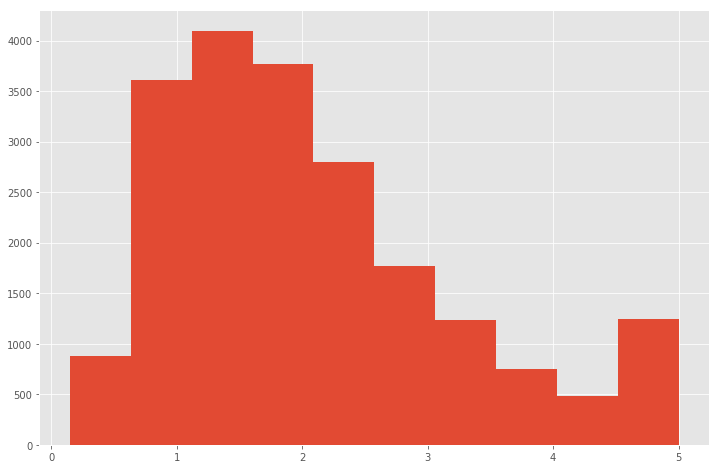

In [62]:
plt.hist(y)

In [63]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

* Нанесите координаты домов и раскрасте их в зависимости от их стоимости
    * HINT: `plt.scatter()`

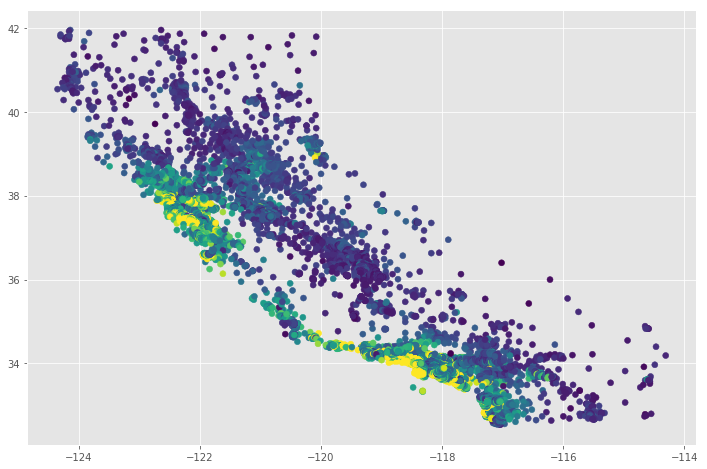

In [64]:
plt.scatter(X[:, -1], X[:, -2], c=y)

* Рассмотрим только координаты домов в качестве признаков. В качестве меры близости будем использовать [расстояние на сфере](https://ru.wikipedia.org/wiki/%D0%9E%D1%80%D1%82%D0%BE%D0%B4%D1%80%D0%BE%D0%BC%D0%B8%D1%8F) (Земле) между координатами. Для этого, для начала, надо перевести координаты из градусов в радианы
    * HINT: `np.radians`
* Расделите данные на обучающую и контрольную выборку
    * HINT: `sklearn.model_selection.train_test_split()` и не забудте указать `random_state`

In [65]:
X = X[:, -2:]

In [66]:
X = np.radians(X)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

In [69]:
X_train.shape

(16512, 2)

In [70]:
X_valid.shape

(4128, 2)

* Создайте kNN классификатор с метрикой `haversine`
    * HINT: sklearn.metrics
* Для k = 1..15 изобразите среднее абсолютное отклонение ответов модели на обучающей и контрольной выборке
    * Какие методологические ошибки были допущены
    * Какое значение $k$ оптимально?

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
from sklearn.metrics import mean_absolute_error

In [73]:
knn = KNeighborsRegressor(n_neighbors=10, metric='haversine')

In [74]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='haversine',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [75]:
y_hat = knn.predict(X_valid)

In [76]:
y_hat.shape

(4128,)

In [77]:
mean_absolute_error(y_hat, y_valid)

0.33340470712209297

In [78]:
quality_valid = []
quality_train = []

for k in range(1,16):
    knn = KNeighborsRegressor(n_neighbors=k, metric='haversine')
    knn.fit(X_train, y_train)
    y_hat_valid = knn.predict(X_valid)
    y_hat_train = knn.predict(X_train)
    
    quality_valid.append(mean_absolute_error(y_valid, y_hat_valid))
    quality_train.append(mean_absolute_error(y_train, y_hat_train))
    

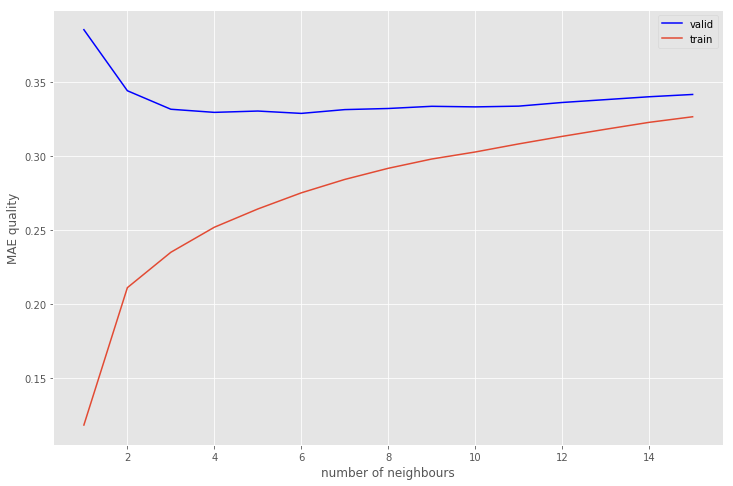

In [79]:
k_range = range(1,16)
plt.plot(k_range, quality_valid, color='blue', label='valid')
plt.plot(k_range, quality_train, label='train')
plt.xlabel('number of neighbours')
plt.ylabel('MAE quality')
plt.legend()

# Оценка уровня заработка

### *1. Categorical Attributes*
 * workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  -  Individual work category  
 * education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  -  Individual's highest education degree  
 * marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  -  Individual marital status  
 * occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  -  Individual's occupation  
 * relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  -  Individual's relation in a family   
 * race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  -  Race of Individual   
 * sex: (categorical) Female, Male.
 * native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  -  Individual's native country   



### *2. Continuous Attributes*
 * age: continuous.
  -  Age of an individual  
 * education-num: number of education year, continuous.
  -  Individual's year of receiving education
 * fnlwgt: final weight, continuous. 
 * The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.
 * capital-gain: continuous.
 * capital-loss: continuous.
 * hours-per-week: continuous.
  -  Individual's working hour per week   





In [80]:
df = pd.read_csv('./data/adult.csv.gz')

In [81]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


* Проанализируйте таблицу на предмет пропущенных значений: сколько их, в каких столбцах их много?

In [82]:
df.isnull().mean()

# Напрямую пропуски не выявляются. Вызывает подозрение знак "?" Давайте скажем pandas, что "?" - это пропуск

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [83]:
df = pd.read_csv('./data/adult.csv.gz', na_values=['?'])
df.isnull().mean()

age                0.000000
workclass          0.057307
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.057512
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.017546
income             0.000000
dtype: float64

In [84]:
df = df.dropna() # удалим пропуски

* Рассмотрите категориальные переменные. Что можно сделать с редкими категориями?
* Выполните переобозначение значений категориальных признаков (где необходимо)

In [85]:
categ_cols = ['education', 'marital-status', 'workclass', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for col in categ_cols:
    print('='*10)
    print(col)
    print(df.loc[:, col].value_counts())

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64
workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sale

* Рассмотрите попарные зависимости между признаками 
* Какие есть взаимосвязи с целевым признаком

In [86]:
# Во-первых можно понять, что признаки с постфиксом "-num" кодируют категории
pd.crosstab(df.education, df.loc[:, 'educational-num'])

educational-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1223,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1619,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,577,0,0,0,0,0,0,0,0
1st-4th,0,222,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,449,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,823,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,676,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1507,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1959,0,0,0,0,0


In [87]:
df.corr(method='spearman') # Корреляция между признаками везде слабая

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.077455,0.067171,0.121161,0.060635,0.157484
fnlwgt,-0.077455,1.000000,-0.032139,-0.009988,-0.002111,-0.020791
educational-num,0.067171,-0.032139,1.000000,0.119901,0.077575,0.165424
capital-gain,0.121161,-0.009988,0.119901,1.000000,-0.067296,0.093086
capital-loss,0.060635,-0.002111,0.077575,-0.067296,1.000000,0.060391
hours-per-week,0.157484,-0.020791,0.165424,0.093086,0.060391,1.000000


In [88]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


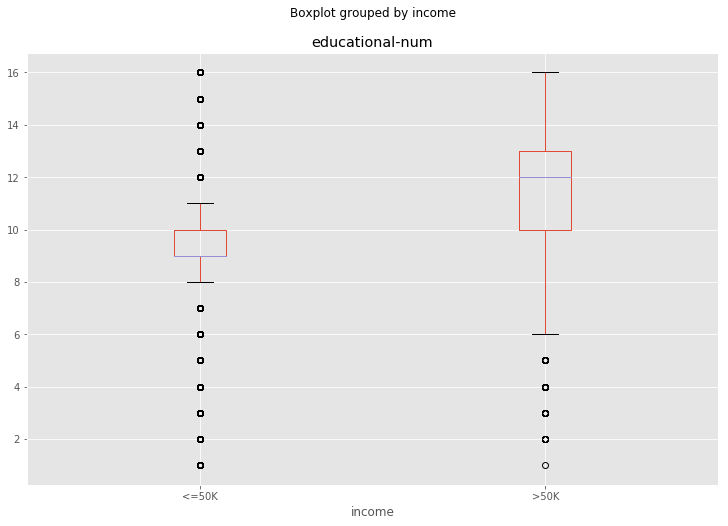

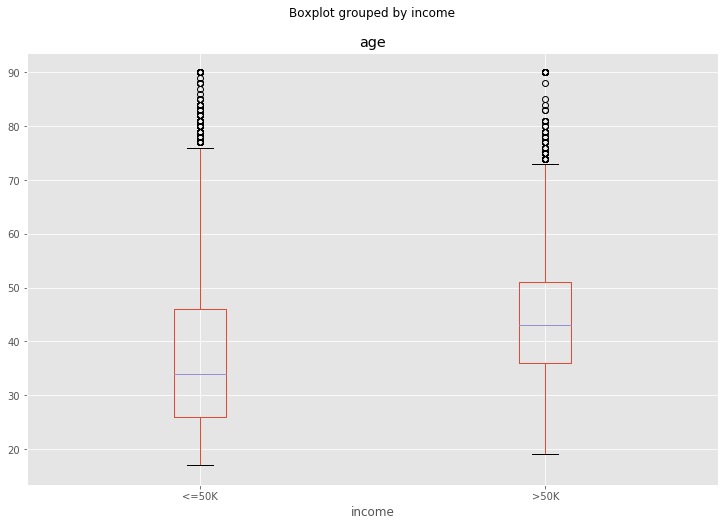

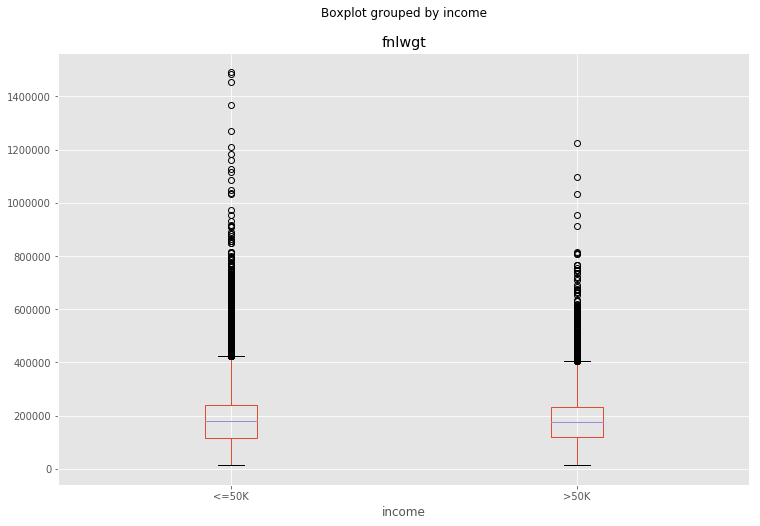

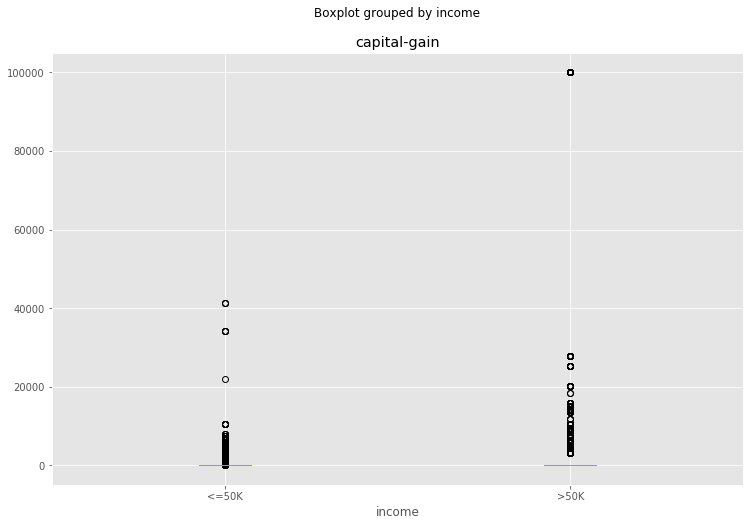

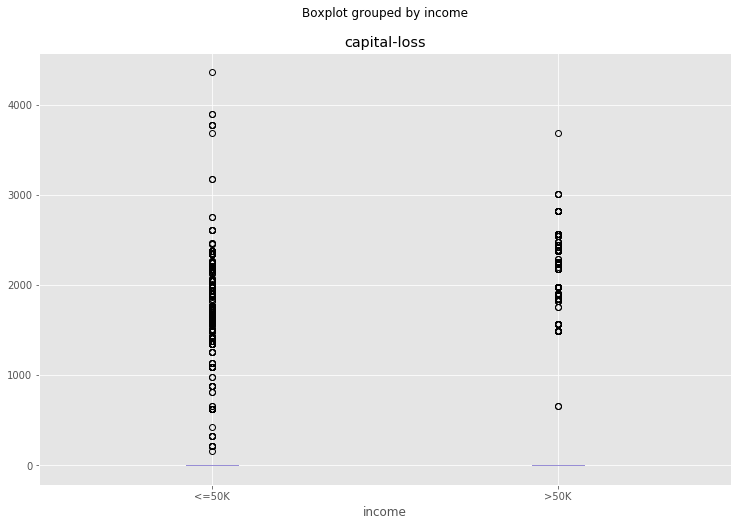

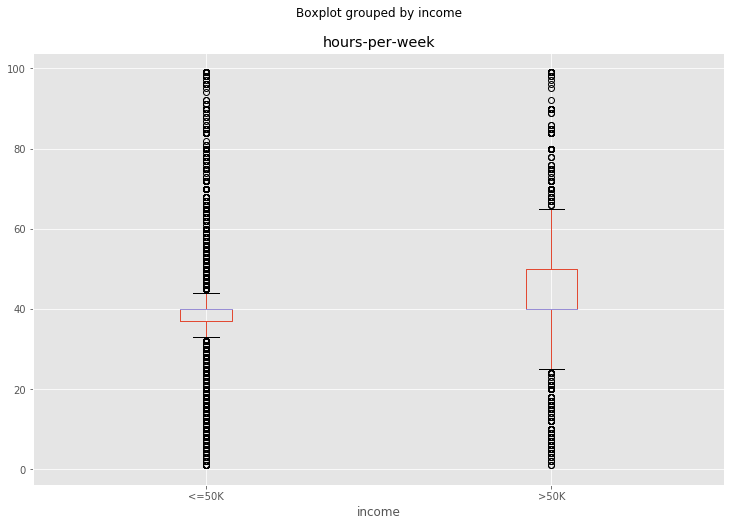

In [89]:
# По некоторым признакам прослеживается четкое различие между классами
numeric_features = ['educational-num', 'age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numeric_features:
    df.boxplot(column=col, by='income')

In [90]:
pd.crosstab(df.income, df.gender, normalize=True, margins=True)

gender,Female,Male,All
income,,,
<=50K,0.288046,0.464110,0.752156
>50K,0.036907,0.210937,0.247844
All,0.324952,0.675048,1.000000


In [91]:
pd.crosstab(df.income, df.race, normalize=True, margins=True)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
income,,,,,,
<=50K,0.008447,0.020654,0.081686,0.006811,0.634558,0.752156
>50K,0.001172,0.008160,0.011808,0.000995,0.225709,0.247844
All,0.009619,0.028813,0.093494,0.007806,0.860267,1.000000


* Преобразуйте данные таким образом, чтобы их можно было подать на вход в классификатор (никаких строк, категориальные признаки в OneHotEncoding)

In [92]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [93]:
drop_cols = ['education', 'native-country', 'relationship']
df = df.drop(drop_cols, axis=1)

idx = df.workclass == 'Without-pay'
df = df.loc[~idx, :]

cols_replaces = {'occupation': {'Armed-Forces': 'Protective-serv'}, 
                 'gender': {'Male': 1, 'Female': 0},
                 'marital-status': {'Married-civ-spouse': 'Married',
                                    'Married-spouse-absent': 'Married', 
                                    'Married-AF-spouse': 'Married', 
                                    'Separated': 'Alone', 
                                    'Divorced': 'Alone',
                                    'Never-married ': 'Alone',
                                    'Widowed': 'Alone'},
                 'income': {'<=50K': 0, '>50K': 1}}
                

df = df.replace(cols_replaces)

df = pd.get_dummies(df, columns=['workclass', 'marital-status', 'occupation', 'race'], prefix_sep='=')

In [94]:
df.shape

(45201, 35)

* Разделите данные на обучающую и валидационную выборку
* Повторите упражнение с выбором значения параметра $k$

In [95]:
label_col = df.columns == 'income'

X = df.loc[:, ~label_col].values
y = df.loc[:, label_col].values.flatten()

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

Сделаем не через train-test split, а через кросс-валидацию. Посмотрим, что делает функция `validation_curve`.

In [111]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

`validation_curve` позволяе исследовать влияние отдельного гиперпараметра модели на ее качество.

Построим валидационные кривые по гиперпараметру глубина дерева (`max_depth`) остальных гиперпараметрах, зафиксированных на значениях по-умолчанию

In [116]:
## Обычный KNN
# model = KNeighborsClassifier()

## KNN с нормализацией признаков
model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

k = range(1, 15)
knn_train_scores, knn_valid_scores = validation_curve(model, X, y, 
                                              'knn__n_neighbors', k,
                                              cv=cv, scoring='roc_auc')
# это значит, что мы будем проверять влияние параметра n_neighbors
# в дапозоне от 1 до 15
# и для этого мы будем использовать 5-fold кросс-валидацию
# с мерой качества roc_auc

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/ut

/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/sklearn/ut

In [117]:
knn_train_scores.shape

(14, 5)

In [118]:
knn_valid_scores.shape

(14, 5)

Посмотрите, что изображает синяя и красная линия

Text(0,0.5,'ROC AUC')

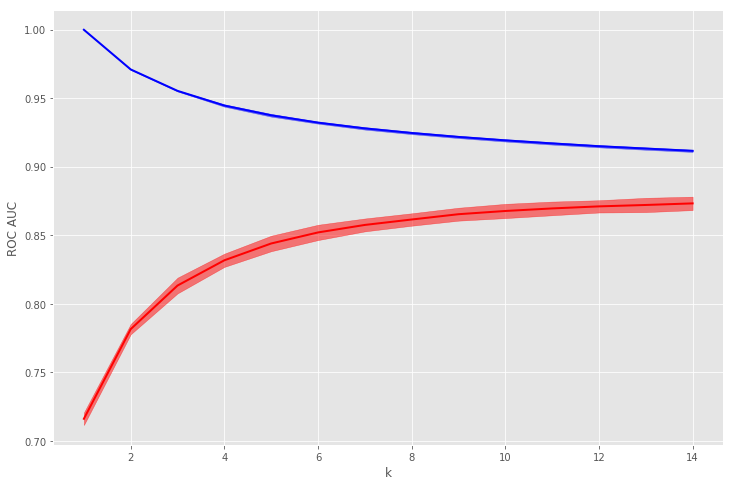

In [120]:
train_score_mean = knn_train_scores.mean(axis=1)
train_score_std = knn_train_scores.std(axis=1)
valid_scores_mean = knn_valid_scores.mean(axis=1)
valid_scores_std = knn_valid_scores.std(axis=1)

plt.fill_between(k, train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(k, valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(k, train_score_mean, c='b', lw=2, label='train')
plt.plot(k, valid_scores_mean, c='r', lw=2, label='validation')

plt.xlabel('k')
plt.ylabel('ROC AUC')